# Final Notebook

## Our Metric

We used safety as our metric in determining the best neighborhood in Pittsburgh. Each of us ranked the best to worst neighborhood, compiled our results and chose a neiborhood that was high up in all our rankings. 

## Looking at Pittsburgh Lead Concentrations per School District - Jacob Shaji

### Introduction

Lead poisoning is known to the cause of many diseases and the concept of this notebook is to look at which school districts have the least amount of lead concentrations in their water with the lead concentration percent as a metric to calculate the best and worst. 

#### Mimimal look at the raw data provided from the WPRDC database

In [2]:
import pandas as pd
import geopandas
import descartes
%matplotlib inline
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [3]:
# import dataset
data = pd.read_csv("wprdc_schooldistrict_ebll15_20.csv")
data.head()

,SchoolDistrict,percentEBLL2015,note2015,percentEBLL2016,note2016,percentEBLL2017,note2017,percentEBLL2018,note2018,percentEBLL2019,note2019,percent2020,note2020,percentEBLL15_20,note15_19
0,Allegheny Valley,0.00,"Unstable percent, interpret with caution",0.00,"Unstable percent, interpret with caution",0.92,"Unstable percent, interpret with caution",0.68,"Unstable percent, interpret with caution",0.00,"Unstable percent, interpret with caution",1.30,"Unstable percent, interpret with caution",0.58,"Unstable percent, interpret with caution"
1,Avonworth,0.72,"Unstable percent, interpret with caution",0.75,"Unstable percent, interpret with caution",0.55,"Unstable percent, interpret with caution",0.89,"Unstable percent, interpret with caution",2.00,"Unstable percent, interpret with caution",0.56,"Unstable percent, interpret with caution",1.02,NaN
2,Baldwin-Whitehall,0.91,"Unstable percent, interpret with caution",0.59,"Unstable percent, interpret with caution",1.40,NaN,1.42,NaN,0.49,"Unstable percent, interpret with caution",0.19,"Unstable percent, interpret with caution",0.98,NaN
3,Bethel Park,0.00,"Unstable percent, interpret with caution",0.00,"Unstable percent, interpret with caution",0.61,"Unstable percent, interpret with caution",0.18,"Unstable percent, interpret with caution",0.89,"Unstable percent, interpret with caution",0.00,"Unstable percent, interpret with caution",0.44,"Unstable percent, interpret with caution"
4,Brentwood Borough,1.60,"Unstable percent, interpret with caution",1.35,"Unstable percent, interpret with caution",3.45,"Unstable percent, interpret with caution",2.68,"Unstable percent, interpret with caution",2.54,"Unstable percent, interpret with caution",2.31,"Unstable percent, interpret with caution",2.47,NaN


From the preview above, it can be seen that lead levels in the water increase by the year.

#### Reading in the Shape file and preview of shape file

,OBJECTID,SCHOOLD,School_Dis,S_District,SchoolDist,note15_19,Pct15_19,geometry
0,1,Allegheny Valley,Allegheny Valley,Allegheny Valley,Allegheny Valley,"Unstable percent, interpret with caution",0.43,"POLYGON ((-79.81144 40.56654, -79.81130 40.561..."
1,2,Avonworth,Avonworth,Avonworth,Avonworth,None,1.15,"POLYGON ((-80.10916 40.57232, -80.10429 40.569..."
2,3,Baldwin-Whitehall,Baldwin-Whitehall,Baldwin-Whitehall,Baldwin-Whitehall,None,1.05,"MULTIPOLYGON (((-80.01709 40.38632, -80.01640 ..."
3,4,Bethel Park,Bethel Park,Bethel Park,Bethel Park,"Unstable percent, interpret with caution",0.51,"POLYGON ((-80.03796 40.28903, -80.04146 40.290..."
4,5,Brentwood Borough,Brentwood Borough,Brentwood Borough,Brentwood Borough,None,2.46,"POLYGON ((-79.96448 40.36971, -79.96455 40.369..."


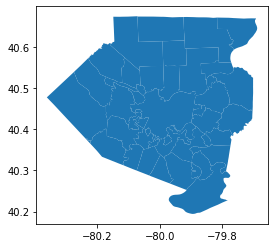

In [4]:
maps = geopandas.read_file("Data/EBLL_SD15_19.shp") # read in the shapefile
maps.plot() # plot the geopandas dataframe
maps.head()

Preview of the boundaries covered by the data set above

#### Preview graph of raw data

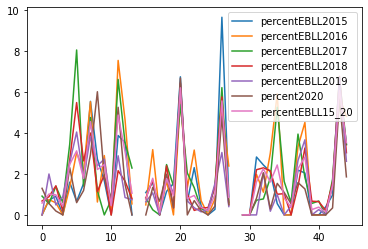

In [5]:
data.plot()

#### Checking the reliability of the data as some are Censored/NaNs

In [6]:
reliability = data[['note2015', 'note2016', 'note2017', 'note2018', 'note2019', 'note2020']]
reliability.count()


print ("Unrealiable values in the dataset")
print ('2015 2016 2017 2018 2019 2020')
for column in reliability:
    print((reliability[column]=='Censored').sum() +
          (reliability[column]=='NaN').sum(), end = "    ")
print("\nPercent reliability of the data: " + str(round(( (45 - 2) / 45 ) * 100, 2)) + "%")

Unrealiable values in the dataset
2015 2016 2017 2018 2019 2020
2    2    2    2    2    2    
Percent reliability of the data: 95.56%


#### Lead Concentration of all the years as a density probability chart

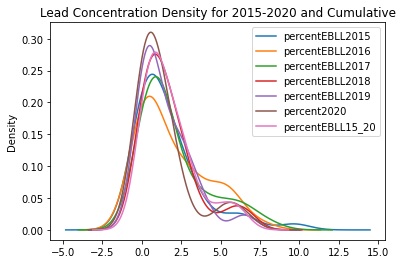

In [7]:
data.plot.density(title = "Lead Concentration Density for 2015-2020 and Cumulative")

As you can see from the 6 graphs above, the higher peaks mean that theres more concentration of lead. For example, in the above graph the two peaks are at ~1 and ~6. This mean most of the data values fall around ~1 and the some others fall around ~6. And so most of the lead concentration in water at each school district falls around ~1. 

#### Looking at how data is spread out over school districts for 2015 and 2020

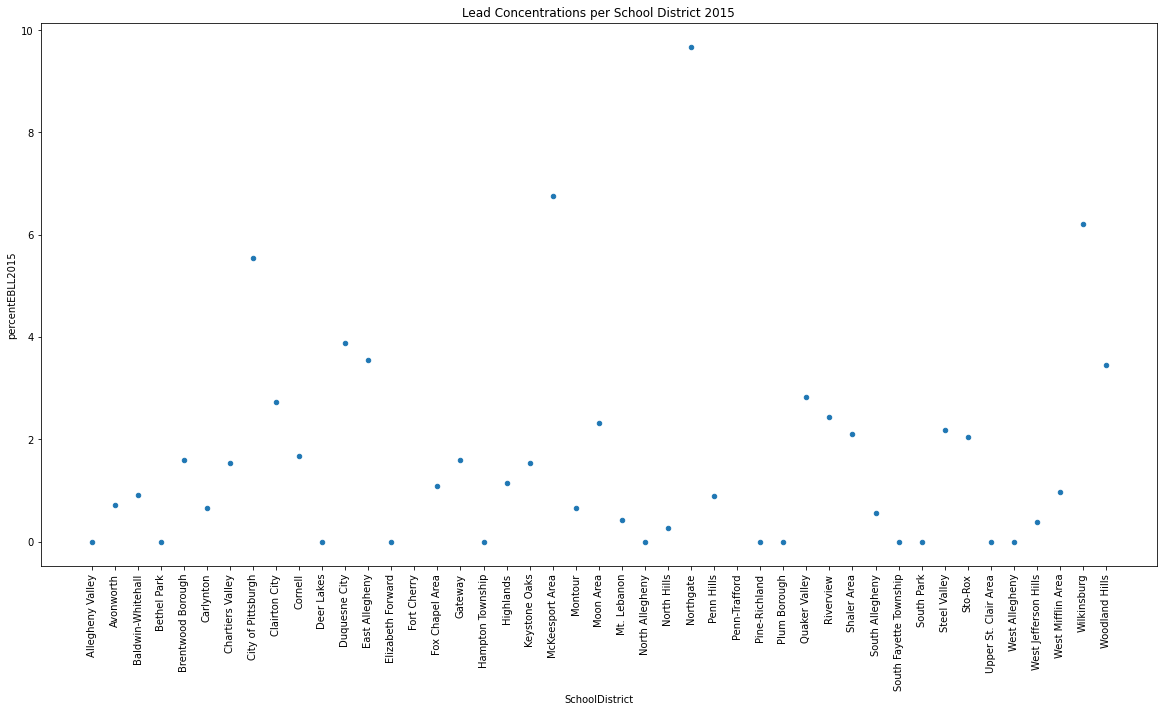

In [8]:
data.plot(kind = 'scatter', x = 'SchoolDistrict', y = 'percentEBLL2015', rot = 90, title = "Lead Concentrations per School District 2015", figsize=(20, 10) )

According to the scatter plot from 2015, the school district with the most amount of lead concentrations is Northgate School District

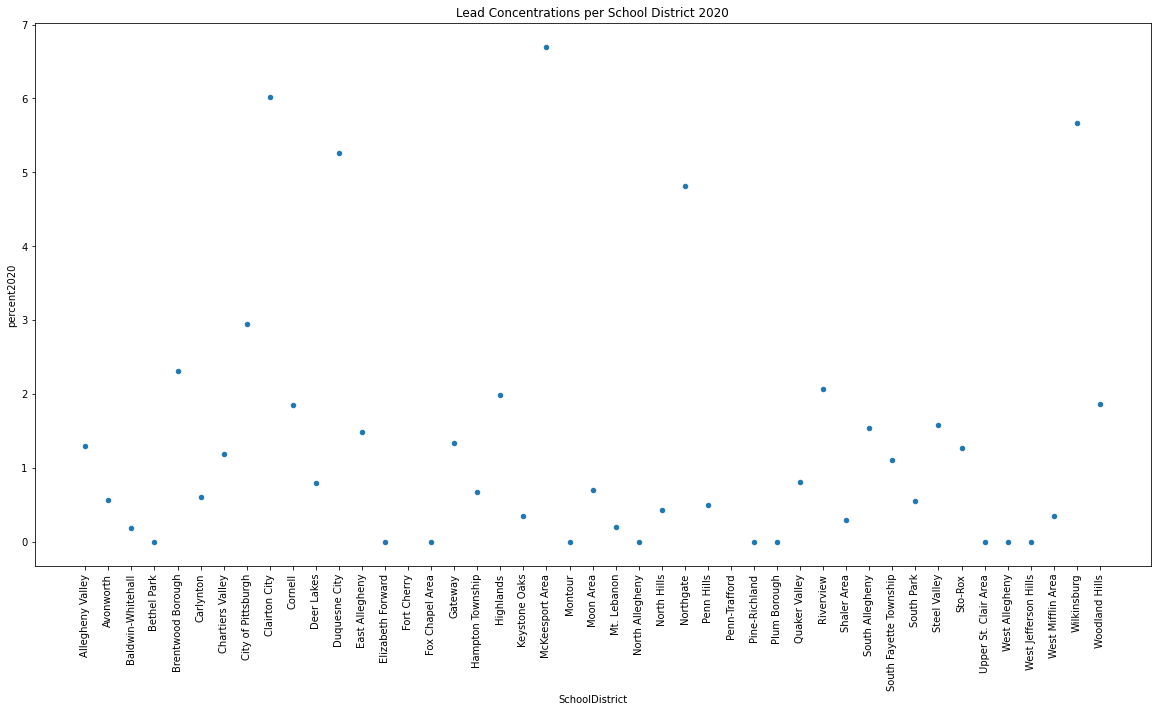

In [9]:
data.plot(kind = 'scatter', x = 'SchoolDistrict', y = 'percent2020', rot = 90, title = "Lead Concentrations per School District 2020", figsize=(20, 10) )

But according to the 2020 lead concentration scatter plot, McKeesport Area School District is the area with the highest amount of lead concentrations. 

#### Simplifing Data

For the sake of simpilicity, only the most recent dataset (from 2020) will be referenced as it is more useful in finguring out the current best neighborhood. 

#### Previewing and Merging Map Data to 2020 Data Set

In [10]:
table_2020 = data[['SchoolDistrict', 'percent2020']]
maps_2020 = maps.merge(table_2020, how = 'left', 
                       left_on = 'SCHOOLD', right_on = 'SchoolDistrict')

In [11]:
maps_2020.head()

,OBJECTID,SCHOOLD,School_Dis,S_District,SchoolDist,note15_19,Pct15_19,geometry,SchoolDistrict,percent2020
0,1,Allegheny Valley,Allegheny Valley,Allegheny Valley,Allegheny Valley,"Unstable percent, interpret with caution",0.43,"POLYGON ((-79.81144 40.56654, -79.81130 40.561...",Allegheny Valley,1.30
1,2,Avonworth,Avonworth,Avonworth,Avonworth,None,1.15,"POLYGON ((-80.10916 40.57232, -80.10429 40.569...",Avonworth,0.56
2,3,Baldwin-Whitehall,Baldwin-Whitehall,Baldwin-Whitehall,Baldwin-Whitehall,None,1.05,"MULTIPOLYGON (((-80.01709 40.38632, -80.01640 ...",Baldwin-Whitehall,0.19
3,4,Bethel Park,Bethel Park,Bethel Park,Bethel Park,"Unstable percent, interpret with caution",0.51,"POLYGON ((-80.03796 40.28903, -80.04146 40.290...",Bethel Park,0.00
4,5,Brentwood Borough,Brentwood Borough,Brentwood Borough,Brentwood Borough,None,2.46,"POLYGON ((-79.96448 40.36971, -79.96455 40.369...",Brentwood Borough,2.31


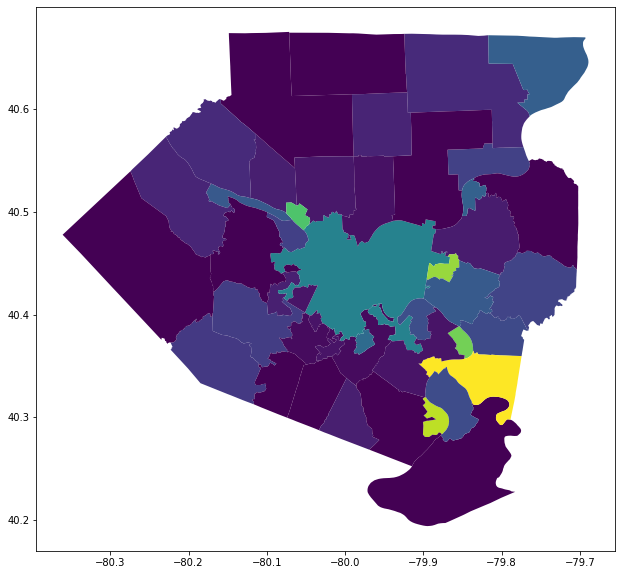

In [56]:
maps_2020.plot(column = 'percent2020', figsize=(20, 10) )

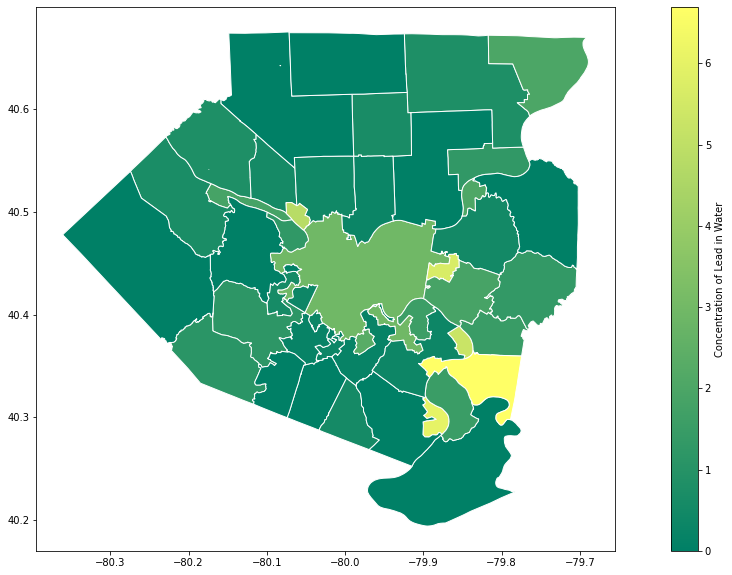

In [12]:
maps_2020.plot(column= 'percent2020',
               cmap= 'summer',          
               edgecolor="white",    
               legend=True,          
               legend_kwds={'label': "Concentration of Lead in Water"},
               figsize=(20, 10)      
               )

<ipython-input-13-631a2b530c22>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  maps_2020["center"] = maps_2020["geometry"].centroid


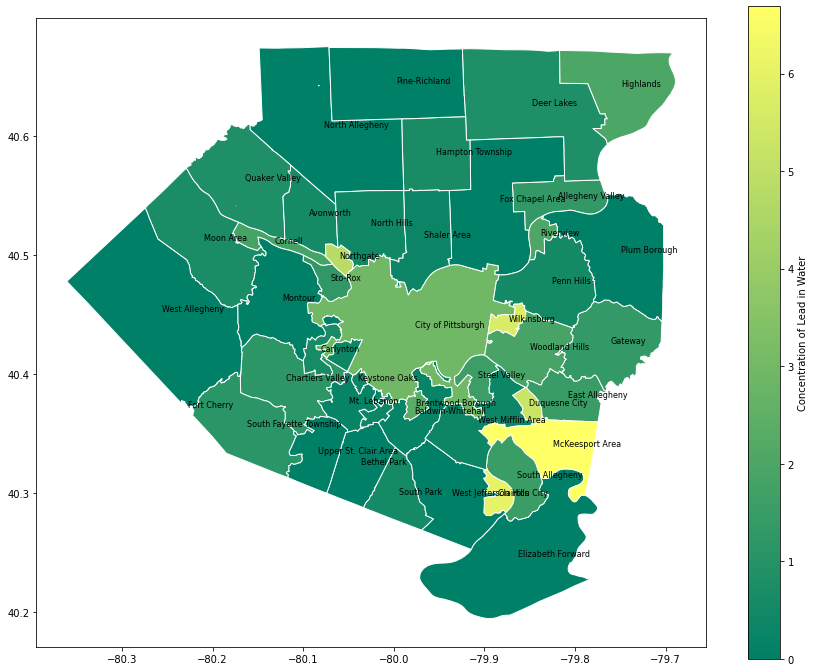

In [13]:
maps_2020["center"] = maps_2020["geometry"].centroid
maps_2020_points = maps_2020.copy()
maps_2020_points.set_geometry("center", inplace = True)
ax = maps_2020.plot(column= 'percent2020',
               cmap= 'summer',          
               edgecolor="white",    
               legend=True,          
               legend_kwds={'label': "Concentration of Lead in Water"},
               figsize=(15, 12) )
texts = []

for x, y, label in zip(maps_2020_points.geometry.x, maps_2020_points.geometry.y, maps_2020_points["SchoolDistrict"]):
    texts.append(plt.text(x, y, label, fontsize = 8))


The yellow school district is the district with the most amount of lead in water and that is McKeesport. 

The yellow school district is the district with the least amount of lead in water and currently unknown just by looking at colors. 

#### Calculating the worst school district with lead pollution

In [14]:
print(table_2020[table_2020.percent2020 == table_2020.percent2020.max()])

     SchoolDistrict  percent2020
20  McKeesport Area         6.69


#### Calculating the best school district without too much lead pollution

In [36]:
print(table_2020[table_2020.percent2020 == table_2020.percent2020.min()])

          SchoolDistrict  percent2020
3            Bethel Park          0.0
13     Elizabeth Forward          0.0
15       Fox Chapel Area          0.0
21               Montour          0.0
24       North Allegheny          0.0
29         Pine-Richland          0.0
30          Plum Borough          0.0
39  Upper St. Clair Area          0.0
40        West Allegheny          0.0
41  West Jefferson Hills          0.0


#### Printing out the rank of each school district

In [19]:
table_2020['Neighborhood'] = {
    'Elizabeth': 'Elizabeth Forward',
    'Bethel Park': 'Bethel Park',
    'Franklin Park': 'North Allegheny',
    'Jefferson Hills': 'West Jefferson Hills',
    'Imperial': 'West Allegheny',
    'Upper St. Clair': 'Upper St. Clair',
    'Plum': 'Plum Borough',
    'McKees Rocks': 'Montour',
    'Gibsonia': 'Pine-Richland',
    'Fox Chapel': 'Fox Chapel Area',
    'Baldwin, Whitehall': 'Baldwin-Whitehall',
    'Mt. Lebanon': 'Mt. Lebanon',
    'Etna': 'Shaler Area',
    'West Miffilin': 'West Mifflin Area',
    'Green Tree': 'Keyston Oaks',
    'North Hills': 'North Hills',
    'Penn Hills': 'Penn Hills',
    'South Park': 'South Park',
    'Ben Avon': 'Avonworth',
    'Carnegie': 'Carlynton',
    'Hampton': 'Hampton Township',
    'Moon': 'Moon Area',
    'Deer Lake': 'Deer Lakes',
    'Lettsdale': 'Quaker Valley',
    'MacDonald': 'South Fayette Township',
    'Bridgeville': 'Chartiers Valley',
    'Stowe': 'Sto-Rox',
    'Harwick': 'Allegheny Valley',
    'Monrowville': 'Gateway',
    'North Versailles': 'East Allegheny',
    'McKeesport': 'South Allegheny',
    'Munhall': 'Steel Valley',
    'Coraopolis': 'Cornell',
    'Forest Hill': 'Woodland Hills',
    'Natrona Heights': 'Highlands',
    'Oakmont': 'Riverview',
    'Brentwood': 'Brentwood Borough',
    'Oakland, South Side': 'City of Pittsburgh',
    'Bellevue': 'Northgate',
    'Duquesne': 'Duquesne City',
    'Wilkinsburgh': 'Wilkinsburg',
    'Clairton': 'Clairton City',
    'McKeesports': 'McKeesport Area',
    'McDonald': 'Fort Cherry',
    'Trafford': 'Penn-Trafford'
}
table_2020.sort_values(by='percent2020')

,SchoolDistrict,percent2020,Neighborhood
13,Elizabeth Forward,0.00,West Miffilin
3,Bethel Park,0.00,Jefferson Hills
24,North Allegheny,0.00,MacDonald
41,West Jefferson Hills,0.00,Clairton
40,West Allegheny,0.00,Wilkinsburgh
39,Upper St. Clair Area,0.00,Duquesne
30,Plum Borough,0.00,McKeesport
21,Montour,0.00,Moon
29,Pine-Richland,0.00,North Versailles
15,Fox Chapel Area,0.00,North Hills


### Conclusion

The dataset provided was in terms of school districts so I had to use a shape file and plot in term of school districts. That being said, it will be easy to translate school districts to neighborhoods due to their similarity. So far, the list above is useful in figuring out the school distris with the least of lead concentration. The one thing that surprised me the most was amount of lead concentration in McKeesport in 2020 because it is surrounded by districts with significantly less concentrations. 

## Fire Metric - Jacob Goldstein

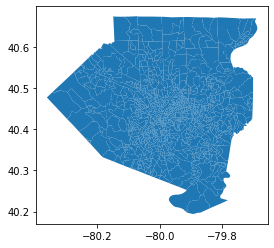

In [2]:
import geopandas as geopandas
import pandas as pandas
import matplotlib.pyplot as plt

map = geopandas.read_file("Shapes/Allegheny_County_Census_Block_Groups_2016.shp")
map.plot()


So the first thing that I decided to do was load in a basic GeoPanda of the area to get a general outline of the area. Soon we will load in our fires so we can get a general understanding of where in Alleghany county we should be looking. 

(-80.39448204221948, -79.6551586277836, 40.170321322082884, 40.6989726150925)

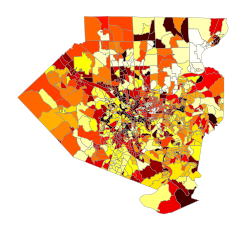

In [2]:
map.plot(cmap='hot', linewidth=0.3, edgecolor='0.5', legend = True)
plt.axis('off')

Then I decided to load in our fire data into our shapes, and run the code using the Inferno colorscheme. This way we can get a basic understanding before truly diving into our code.

In [3]:
df = pandas.read_csv('fire.csv')
df.head()

,call_id_hash,service,priority,priority_desc,call_quarter,call_year,description_short,city_code,city_name,geoid,census_block_group_center__x,census_block_group_center__y
0,000015F42010D7E9BFD0478A34A274,Fire,F1,Potential to become a threat to life safety.,Q4,2019,NATURAL GAS ISSUE,WBG,WILKINSBURG,4.200356e+14,-79.875531,40.443989
1,00021C3CC2642C0843EECEEDDCEBDA,Fire,Q1,EMS ALS life threatening response,Q2,2018,EMS CALL/ASSIST,PGH,PITTSBURGH,4.200327e+14,-80.031346,40.463178
2,000388BD0E2E1C493226DEB18A44E9,Fire,Q0,EMS ALS life threatening response w/ backup,Q3,2019,EMS CALL/ASSIST,PGH,PITTSBURGH,4.200308e+14,-79.934916,40.460684
3,000460CED4F90098D1E6788565AA35,Fire,Q1,EMS ALS life threatening response,Q3,2017,EMS CALL/ASSIST,PGH,PITTSBURGH,4.200302e+14,-79.993440,40.447701
4,00055108E15C5F3527D6606B1F06AD,Fire,F2,Incidents actively occurring or that has just ...,Q1,2016,WIRES FIRE/ARCING/UNK DANGER,BWB,BALDWIN BORO,4.200348e+14,-79.967189,40.397455


Next up I decided that I would load in the head of the CSV file given by the database, and get a little sneak peak into the formatting of the database provided. It showed me the basic layout, and allowed me to plan on how I was going to extract the data from the CSV. We ran into a problem :(. I realized that the dataset was ALL of Alleghany county. But I remembered that the shapes had a much more in depth neighborhood by neighborhood view. 

It was time for recovery. I needed to pare down the CSV file to include only Pittsburgh and then use GeoID to figure out what neighborhood was what. This was going to be painful.

In [4]:
pf = pandas.read_csv('geoID.csv')
pf.head()

,geoid
0,420033000000000
1,420031000000000
2,420030000000000
3,420031000000000
4,420031000000000


So now we have a really fun job to do. We need to figure out through the GeoID's which neighorhood begins with which ID. Time to go to the internet. 

![no time](https://media.tenor.co/images/f40cf74063d462f5f3814f14b4e4c545/raw)

Taking a look at these geoID's, the only values that really matter are the first 6. We are going to borrow another dataset to view the GeoID's and match them to neighborhoods manually.

Through our data analysis we were able to make this equivalency below:
DISTRICTS SEPERATED INTO POLITICAL JURISDICTIONS
- 420032 - Northside
- 420031 - Beechview
- 420035 - Arlington Heights
- 420033 - Overbrook area
- 420036 - Squirrel Hill South 
- 420030 - Oakland Area
- 420034  - Westwood Area

Now, the westwood general area is so small we are going to add it to it's neighboring area Arlington Heights and then add that to the Overbrook area as they are all extremely small neighborhoods.

In [16]:
from random import sample
from collections import Counter

pf['geoid'].value_counts()

420031000000000    99767
420032000000000    59775
420033000000000    53870
420030000000000    47695
420036000000000    42449
420040000000000    12254
420035000000000      320
420034000000000        7
Name: geoid, dtype: int64

![data](https://j.gifs.com/Kd0Mo2.gif)

It's time for us to come up with some meaningful data.

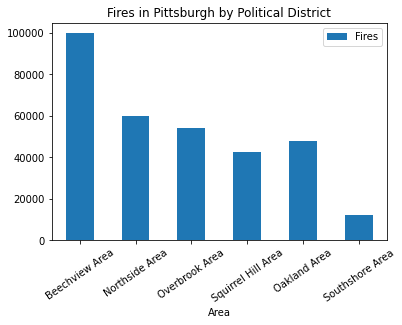

In [4]:
data = [['Beechview Area', 99767], ['Northside Area', 59775] ,['Overbrook Area', 54197], ['Squirrel Hill Area', 42449],  ['Oakland Area', 47695], ['Southshore Area', 12254]]
firesDf = pandas.DataFrame(data, columns = ['Area', 'Fires'])
firesDf.plot.bar(x="Area", y="Fires", rot=35, title="Fires in Pittsburgh by Political District");

OK. We have finally come up with some meaningful visualization of the fires within the City of Pittsburgh. It's time for us to go neighborhood by neighborhood and split up the amounts based off of the populations within each district on the map.

Ok. Time to break up this area into population data.

12254
Southshore:
TOTAL POPULATION: 14,235 
Fairywood: 1,002 = 862
Windgap: 2,270 = 1,954
East Carnagie: 570 = 491
Greentree: 4,885 = 4,205
West End: 415 = 357
Elliot: 2,381 = 2,044
Crafton Heights: 2,411 = 2,075
Espelen: 301 = 259

99767
Beechview:
TOTAL POPULATION: 76,239
South shore: 19 - 25
Mount washington: 14,567 - 19,062
Beltzhoover: 1,925 - 2,519
Bon air: 18,052 - 23,623
Carrick: 7,698 - 10,074
Overbrook: 800 - 1,046
Brookline: 13,214 - 17,292
Knoxville: 3,747 - 4,903
Southside flats: 6,736 - 8,814
Southside slopes: 4,288 - 5,611
Mount oliver: 3,324 - 4,350
Arlington: 1,869 - 2,445

54197
Overbrook:
TOTAL POPULATION: 13,776
Hays: 5,242 - 20,622
Hazelwood: 4,317 - 16,983
Glen Hazel: 716 - 2,816
New Homestead: 990 - 3,895
Lincoln Place: 3,227 - 12,695

42449
Squirrel Hill:
TOTAL POPULATION:115,030
Squirrel Hill: 11,363 - 4,193
Greenfield: 7,294 - 2,691
Swisshelm park: 1,361 - 502
Regent square: 928 - 342
Point breeze: 5,315 - 1961
Shadyside: 14,317 - 5,283
Homewood:3,280 - 1,210
East hills: 3,169 - 1,170
Bloomfield: 8,442 - 3,115
Friendship: 1,785 - 658
East liberty: 5,869 - 2,166
Garfield: 3,675 - 1,356
Lawrenceville: 4,482 - 1,653
Stanton heights: 3,012 - 1,112
Morningside: 29,460 - 10,871
Highland park: 6,395 - 2,359
Lincoln-Larmier: 4,883 - 1,801

59775
Northside:
TOTAL POPULATION:24,573
Brighton Heights: 7,247 - 17,629
Marshall Shadeland: 6,043 - 14,700
Manchester: 2,130 - 5,181
North shore: 303 - 739
Troy hill: 2,714 - 6,602
Spring garden: 884 - 2,150
Kirkbride: 601 - 1,461
Observatory hill: 4,050 - 9,851

47695
Oakland:
TOTAL POPULATION: 23,368
Downtown: 4,896 - 9,992
Uptown: 5,882 - 12,005
Strip district: 616 - 1,257
Polish hill:1,274 - 2,600
Hill district: 2,057 - 4,198
Oakland: 8,663 - 17,681


![math](https://thumbs.gfycat.com/WideeyedHastyCrane-max-1mb.gif)

Time to finally make data that my team can use. ``Lets get it done``.

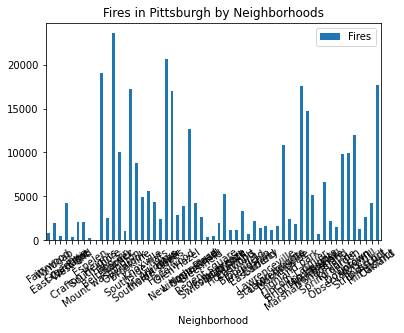

In [3]:
finalized = [['Fairywood', 862], ['Windgap', 1954] ,['East Carnagie', 491], ['Greentree', 4205],  ['West End', 357], ['Elliot', 2044], ['Crafton Heights', 2075], ['Espelen', 259], ['South shore', 25], ['Mount washington', 19062], ['Beltzhoover', 2519],['Bon air', 23623],['Carrick', 10074],['Overbrook', 1046], ['Brookline', 17292],['Southside flats', 8814],['Knoxville', 4903],['Southside slopes', 5611],['Mount oliver', 4350],['Arlington', 2445],['Hays', 20622],['Hazelwood', 16983],['Glen Hazel', 2816],['New Homestead', 3895],['Lincoln Place', 12695],['Squirrel Hill', 4193],['Greenfield', 2691],['Regent square', 342],['Swisshelm park', 502],['Point breeze', 1961],['Shadyside', 5283],['Homewood', 1210], ['East hills', 1170],['Bloomfield', 3315],['Friendship', 658],['East liberty', 2166],['Garfield', 1356],['Lawrenceville', 1653], ['Stanton heights', 1112],['Lawrenceville', 1653],['Morningside', 10871],['Highland park', 2359],['Lincoln-Larmier', 1801], ['Brighton Heights', 17629],['Marshall Shadeland', 14700],['Manchester', 5181],['North shore', 739],['Troy hill', 6602],['Spring garden', 2150],['Kirkbride', 1461],['Observatory hill', 9851],['Downtown', 9992],['Uptown', 12005],['Strip district', 1257],['Polish hill', 2600],['Hill district', 4198],['Oakland', 17681]]
finalizedFiresHoods = pandas.DataFrame(finalized, columns = ['Neighborhood', 'Fires'])
finalizedFiresHoods.plot.bar(x="Neighborhood", y="Fires", rot=35, title="Fires in Pittsburgh by Neighborhoods");

In [11]:
subset = finalizedFiresHoods.nlargest(10, 'Fires')
subset.head(10)

,Neighborhood,Fires
11,Bon air,23623
20,Hays,20622
9,Mount washington,19062
56,Oakland,17681
43,Brighton Heights,17629
14,Brookline,17292
21,Hazelwood,16983
44,Marshall Shadeland,14700
24,Lincoln Place,12695
52,Uptown,12005


We have finally produced a new subset of our list showing the 10 places with the least number of fires.

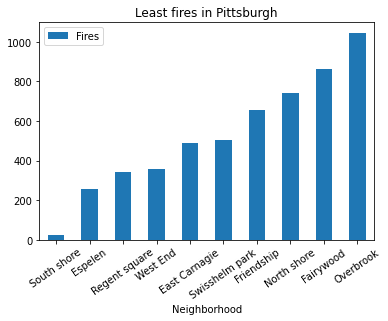

In [6]:
subset.plot.bar(x="Neighborhood", y="Fires", rot=35, title="Least fires in Pittsburgh");

# My closing remarks and reflections off of my data alone
The best place to live in Pittsburgh by far is the South Shore. They see the least number of fires and have a medium population as well. This makes sense in my mind, as it is away from the main area of Pittsburgh and more of a suburb to the community. This project opened my eyes to the scope of data sets and only through tedious hours of programming and doing math to calculate population density, was I able to come to a conclusion on the best places to live in Pittsburgh. In the future, I would definitely choose a smaller data set as this made the challenge of analyzing the data even harder. Overall, it was a great learning experience.

## Number of arrests in Pittsburgh - Avin Patel

Less arrests means that the nighborhood is more likey to be safer than a neighborhood with more arrests, so we decided to see how many arrests happened in each neighborhood.

In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

So first we import the arrest data

In [2]:
data = pd.read_csv("arrests.csv")
data

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54526,2046502,22040092,34.0,M,B,2022-03-18T11:24:00,"N Homewood AV & Frankstown AV Pittsburgh, PA 1...",903 Criminal Conspiracy. / 907 Possessing Inst...,"N Homewood AV & Frankstown AV Pittsburgh, PA 1...",Homewood North,5,1302.0,9.0,2.0,-79.896301,40.457405
54527,2046503,22040258,30.0,M,W,2022-03-18T17:20:00,"8500 Block Frankstown AV Pittsburgh, PA 15221",9501 Bench Warrant,"8500 Block Frankstown AV Pittsburgh, PA 15221",East Hills,5,1306.0,9.0,2.0,-79.875427,40.458106
54528,2046504,22024352,22.0,M,B,2022-03-10T10:00:00,"600 Block 1st AV Pittsburgh, PA 15219",13(a)(16) Possession of Controlled Substance /...,"4300 Block Coleridge ST Pittsburgh, PA 15201",Stanton Heights,5,1005.0,9.0,2.0,-79.941903,40.477560
54529,2046505,22031051,48.0,M,W,2022-03-16T01:48:00,"1500 Block Alverado ST Pittsburgh, PA 15216",2718(a)(1) Strangulation - Applying Pressure t...,"1500 Block Alverado ST Pittsburgh, PA 15216",Brookline,6,1918.0,NaN,NaN,0.000000,0.000000


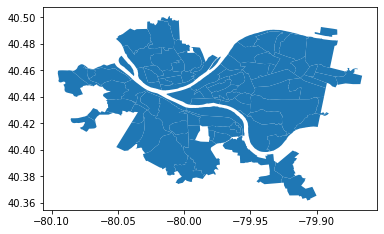

In [3]:
map = geopandas.read_file("Neighborhoods_.shp")
map.plot()

In [4]:
rates = pd.value_counts(data.INCIDENTNEIGHBORHOOD).reset_index()
rates.columns = ['Neighborhood', 'Arrests']
rates

,Neighborhood,Arrests
0,Central Business District,3315
1,South Side Flats,2843
2,Carrick,1960
3,East Allegheny,1773
4,Homewood South,1744
...,...,...
93,Regent Square,28
94,Central Northside,23
95,Mt. Oliver Boro,18
96,Troy Hill-Herrs Island,6


Here we show all the neighborhoods and the number of arrests as a bar graph.

Text(0, 0.5, 'Amount')

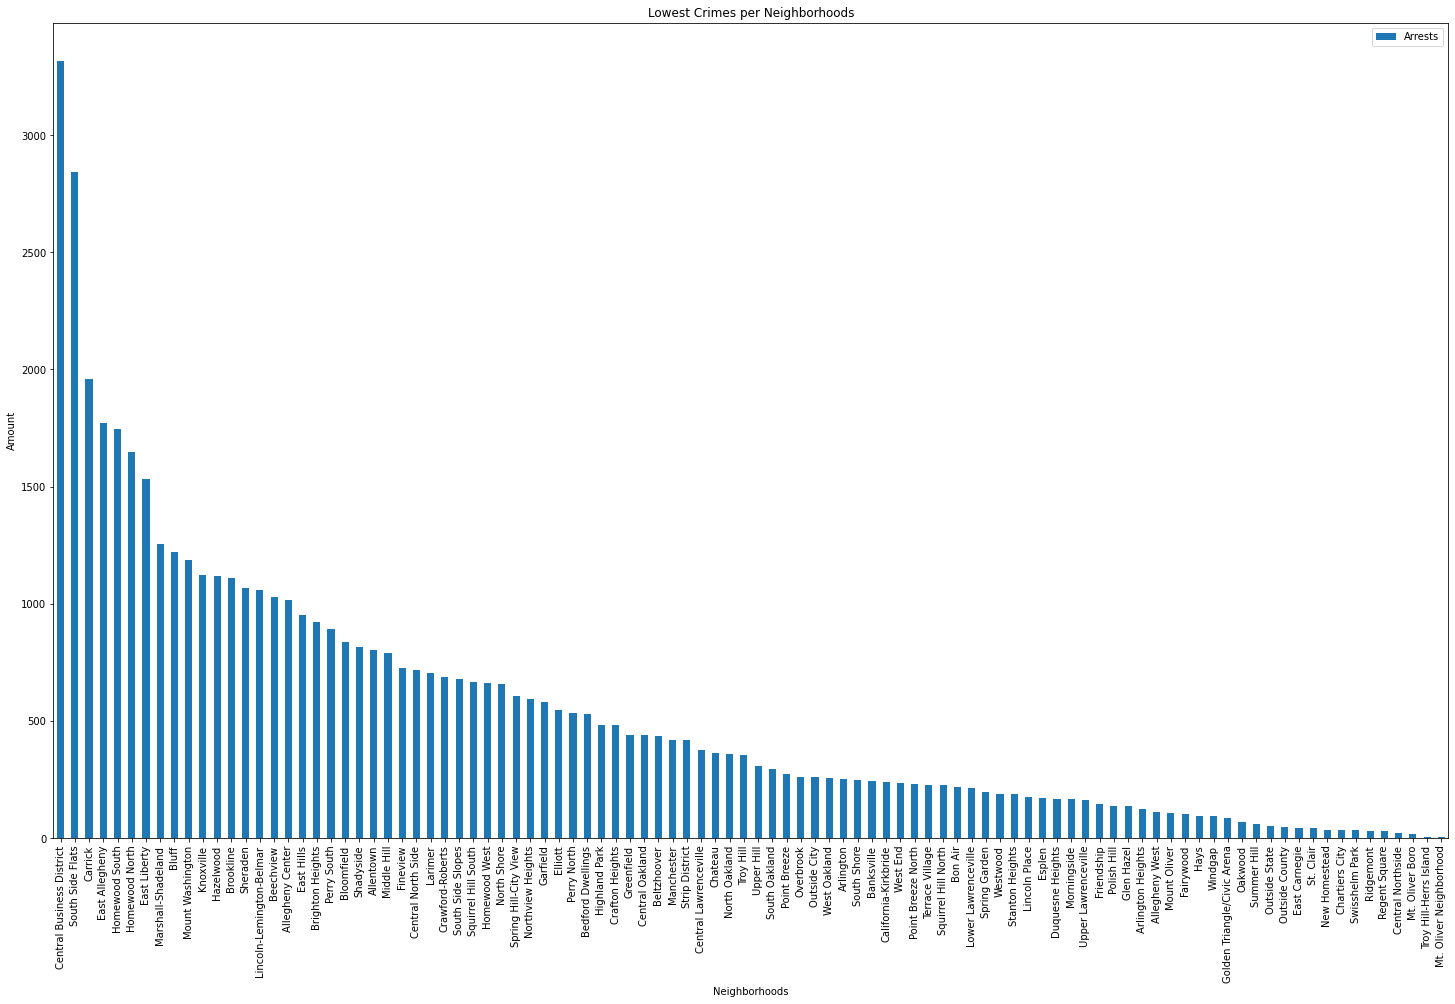

In [5]:
rates.plot(kind="bar", figsize=(25,15), x="Neighborhood", y="Arrests")
plt.title("Lowest Crimes per Neighborhoods")
plt.xlabel("Neighborhoods")
plt.ylabel("Amount")

We merge the data from arrests and map based on neighborhood names.

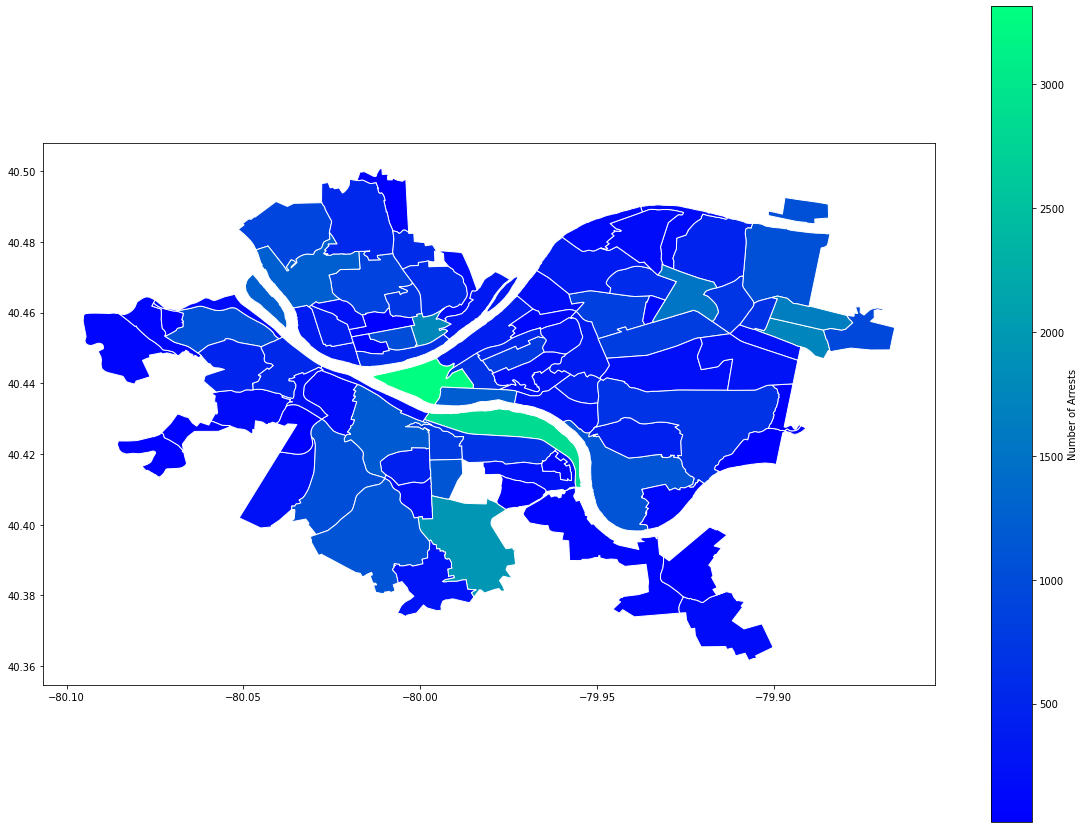

In [6]:
arrestsMap = map.merge(rates, how = 'left', left_on = 'hood', right_on = 'Neighborhood')
arrestsMap.head(10)
arrestsMap.plot(column='Arrests',
              cmap='winter',
              edgecolor='white',
              legend=True,
              legend_kwds={'label':'Number of Arrests'},
              figsize=(20, 15),
              missing_kwds={'color': 'white'}
              )

So in terms of safety, Mt. Oliver is the best with Central Business District being the worst.

# Our Conclusion
Regent Square appears within the top 10 for all of our data. It is by far the safest neighborhood when regarding safety. Safety against other people, against nature, and against health hazards is essential in determining a solid place to live throughout Pittsburgh. In addition to this we have determined that Kennywood has some serious issues and should be avoided due to health hazards and safety issues. Below we have our individual statements regarding the project.

## Jacob Goldstein
I was very surprised that South Shore was not the safest area for all of the other safety categories, it seemed like a very safe neighborhood!

## Jacob Shaji
Though I was surprised with Regency Square being the best neighborhood, it also makes sense because it far from most of the disadvantages of the city but is close enough to get most of the advantages of the Pittsburgh city. 

## Avin Patel
I was surprised that Regency Sqaure was the best neighborhood instead of Mt. Oliver or South Shore, because it seemed that both might be able be the best nighborhood. It makes sense that Regency Square is the best neighborhood because its ranked among top 10 in all three metrics.